In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

In [53]:
sales_df = pd.read_csv('../clean_data/sales.csv')
product_master_df = pd.read_excel('../data/MasterData/Productmaster.xlsx')

In [54]:
df = pd.merge(sales_df, product_master_df, on='product_id', how='inner')

In [55]:
df = df[['week', 'sold_quantity', 'cost_price_x', 'net_price', 'product_group', 'channel_id']]
df['profit'] = df['net_price'] - df['cost_price_x']
df.rename(columns={'sold_quantity': 'quantity'}, inplace=True)
df.drop(['cost_price_x', 'net_price'], axis=1, inplace=True)

In [56]:
df['year'] = df['week'].apply(lambda x: int(str(x)[:4]))
df['week'] = df['week'].apply(lambda x: int(str(x)[4:]))
df = df[['week', 'year', 'product_group', 'channel_id', 'profit', 'quantity']]

In [57]:
df.loc[df['channel_id'] == 'Online', 'channel_id'] = 'ONLINE'
df['channel_id'].unique()

array(['CHTT', 'ST', 'TGPP', 'ONLINE'], dtype=object)

In [58]:
dep_df = df[df['product_group'] == 'DEP']
giay_df = df[df['product_group'] == 'GIA']
sandal_df = df[df['product_group'] == 'SAN']
pk_df = df[df['product_group'] == 'PKI']
tui_df = df[df['product_group'] == 'TBL']

online_df = df[df['channel_id'] == 'ONLINE']
chtt_df = df[df['channel_id'] == 'CHTT']
tgpp_df = df[df['channel_id'] == 'TGPP']
st_df = df[df['channel_id'] == 'ST']

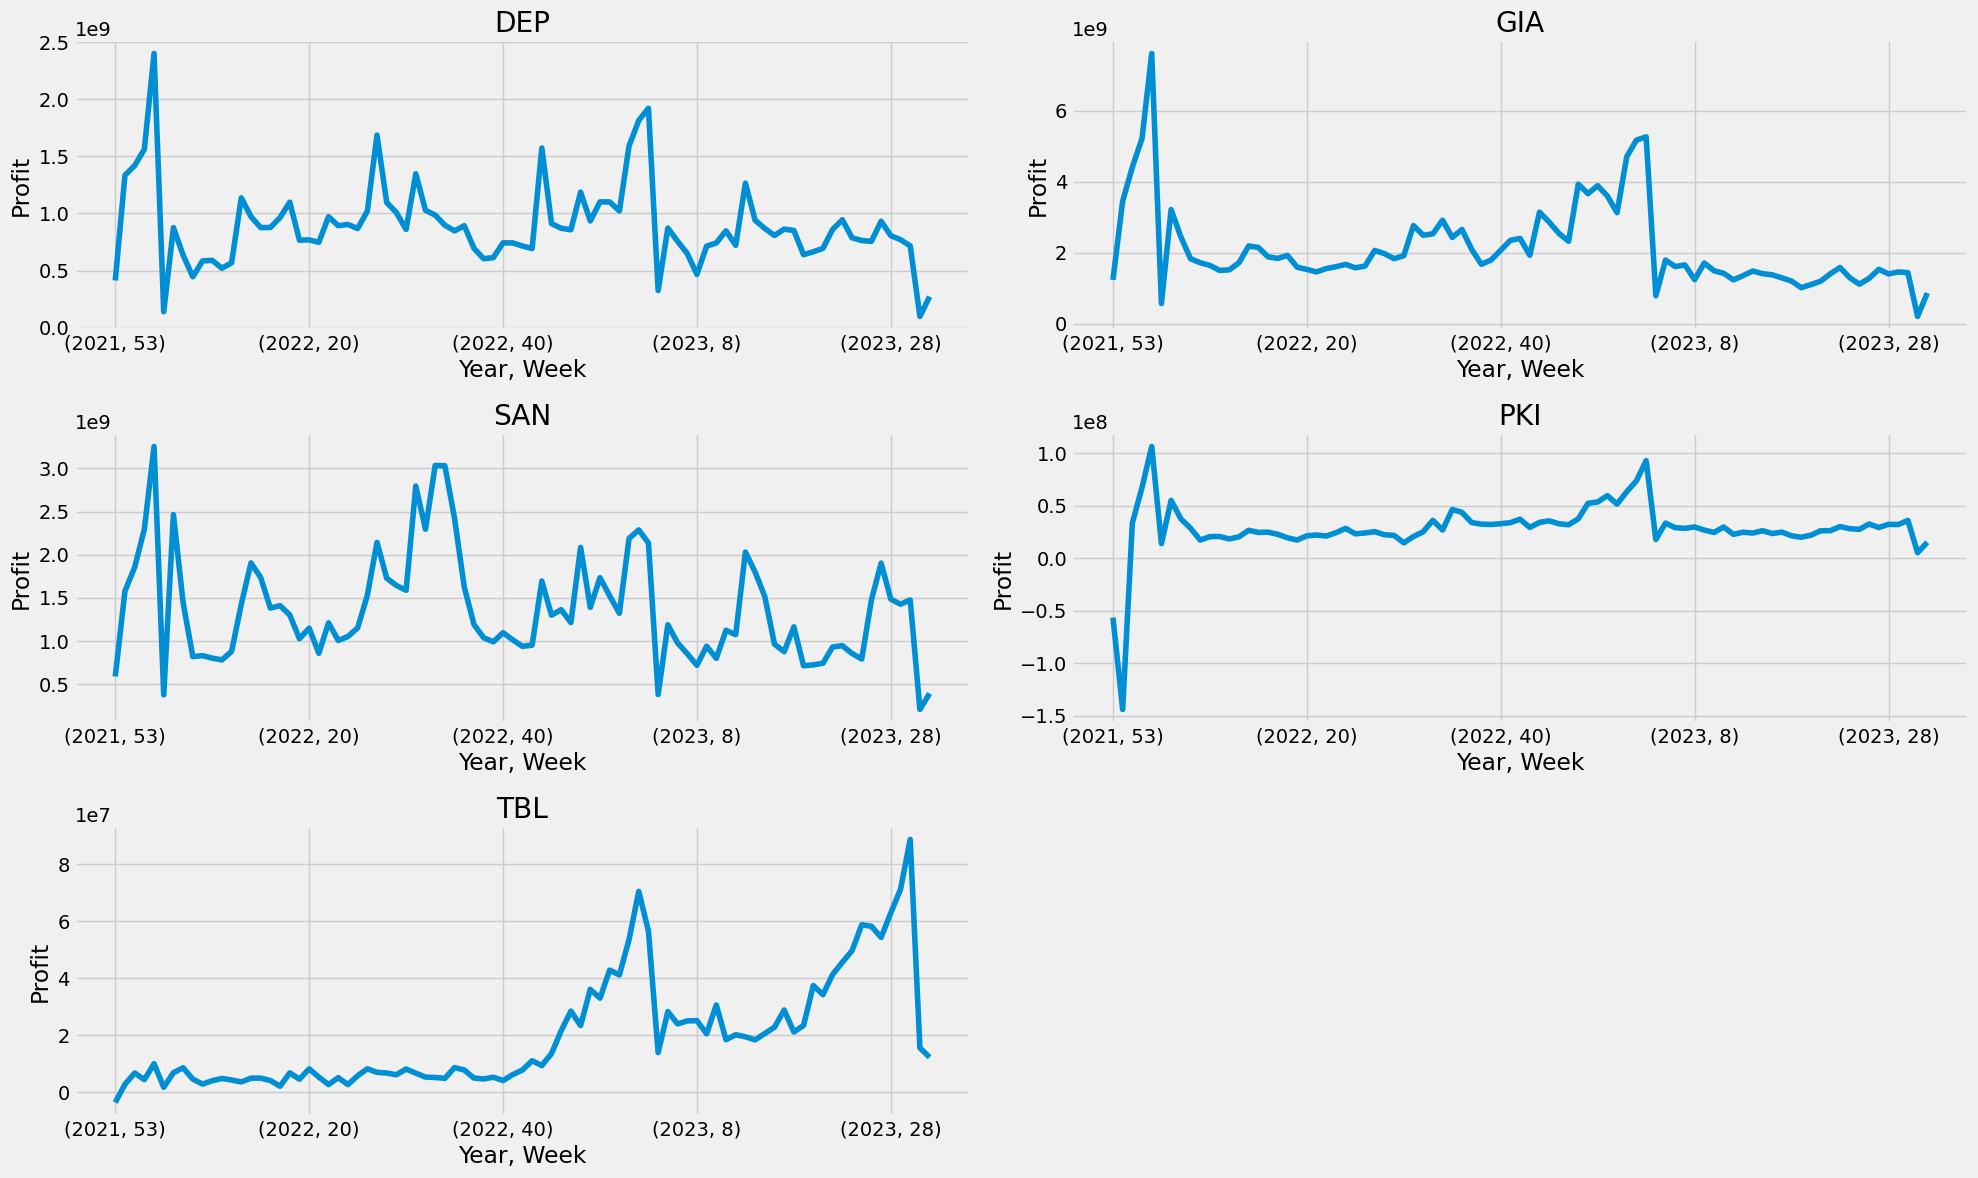

In [59]:
fig, axs = plt.subplots(3, 2, figsize=(20, 12))
for i, df_ in enumerate([dep_df, giay_df, sandal_df, pk_df, tui_df]):
    ax = df_.groupby(['year', 'week'])['profit'].sum().plot(ax=axs[i // 2, i % 2], title=df_['product_group'].iloc[0])
    ax.set_xlabel('Year, Week')
    ax.set_ylabel('Profit')
axs[2, 1].axis('off')
plt.tight_layout()
plt.show()

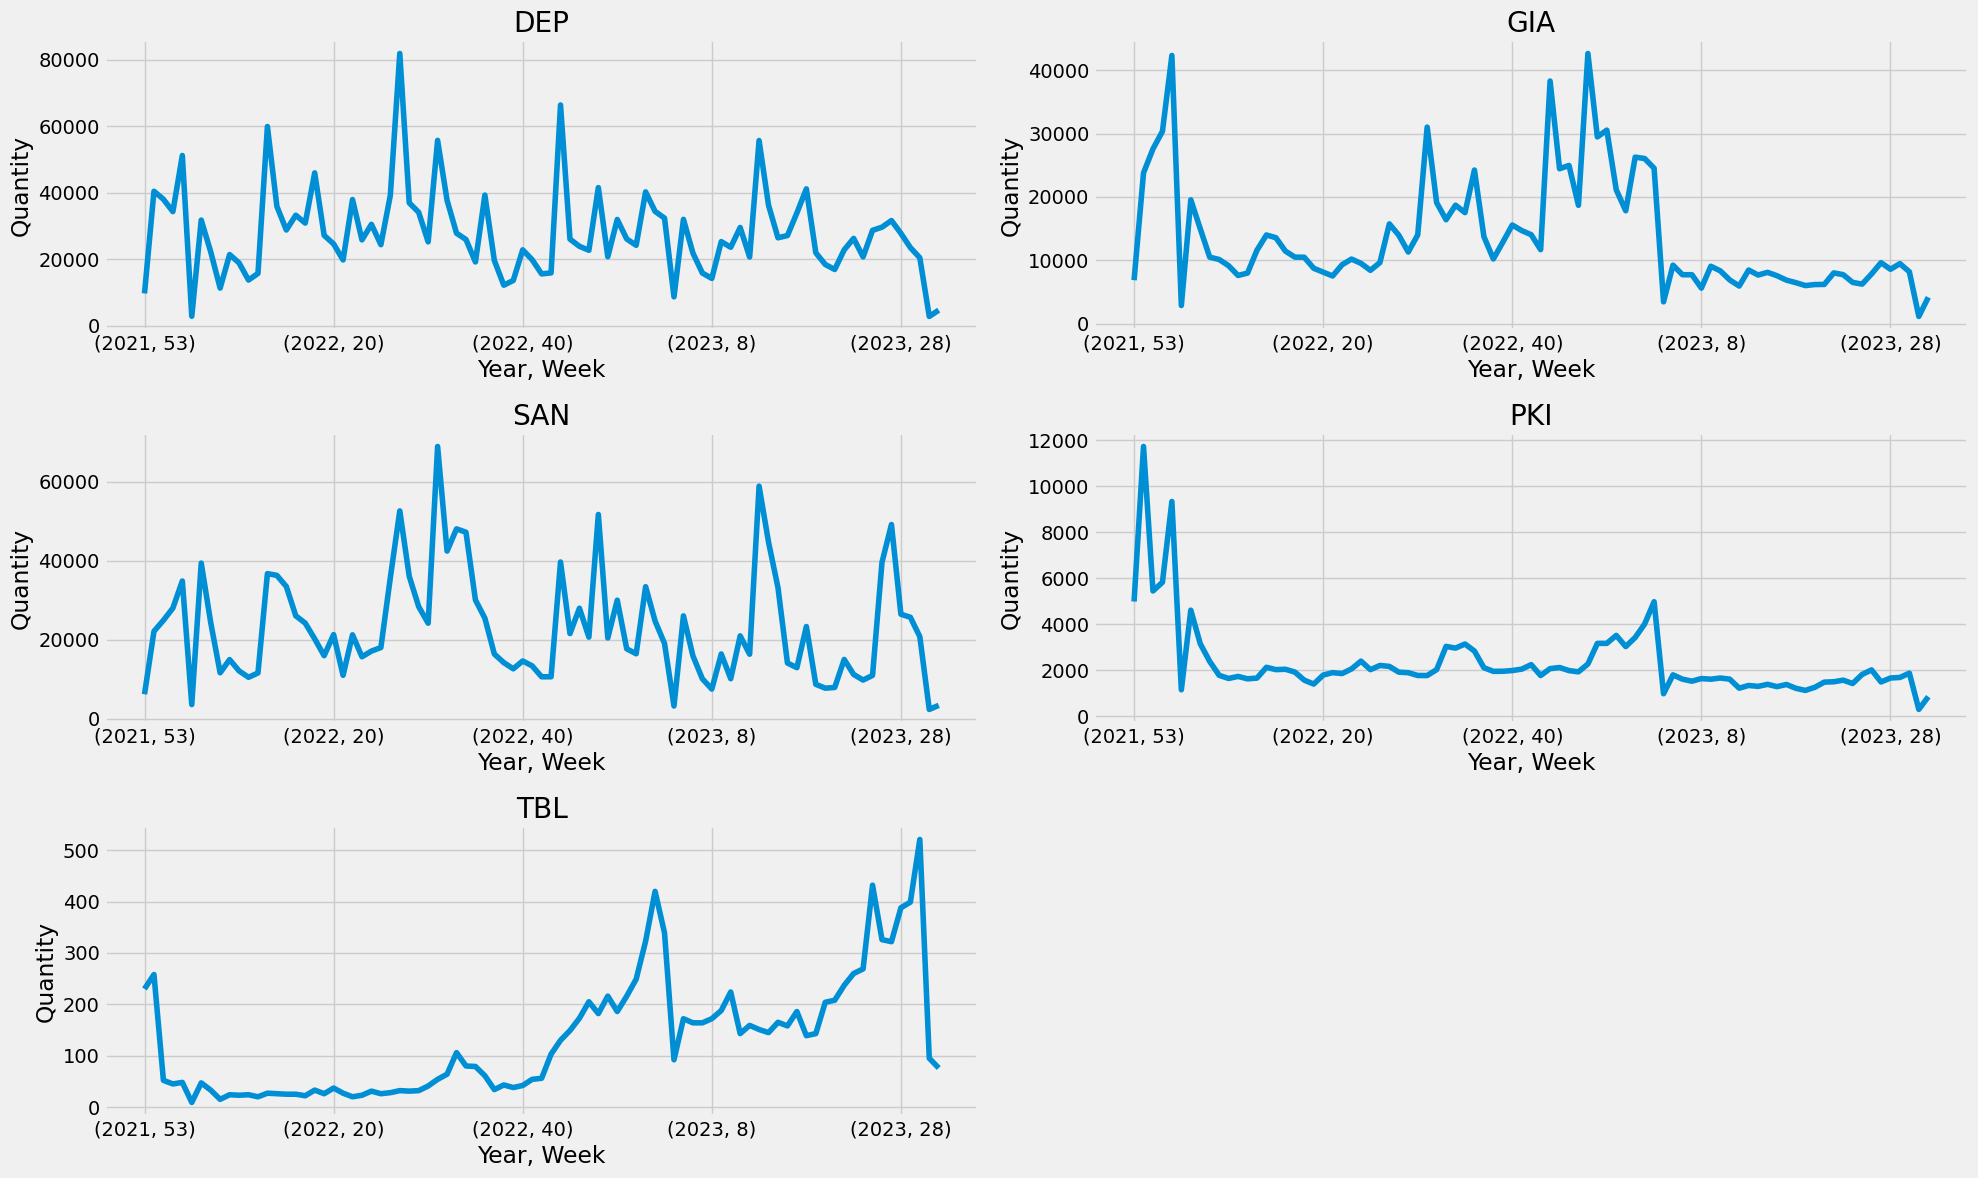

In [60]:
fig, axs = plt.subplots(3, 2, figsize=(20, 12))
for i, df_ in enumerate([dep_df, giay_df, sandal_df, pk_df, tui_df]):
    ax = df_.groupby(['year', 'week'])['quantity'].sum().plot(ax=axs[i // 2, i % 2], title=df_['product_group'].iloc[0])
    ax.set_xlabel('Year, Week')
    ax.set_ylabel('Quantity')
axs[2, 1].axis('off')
plt.tight_layout()
plt.show()

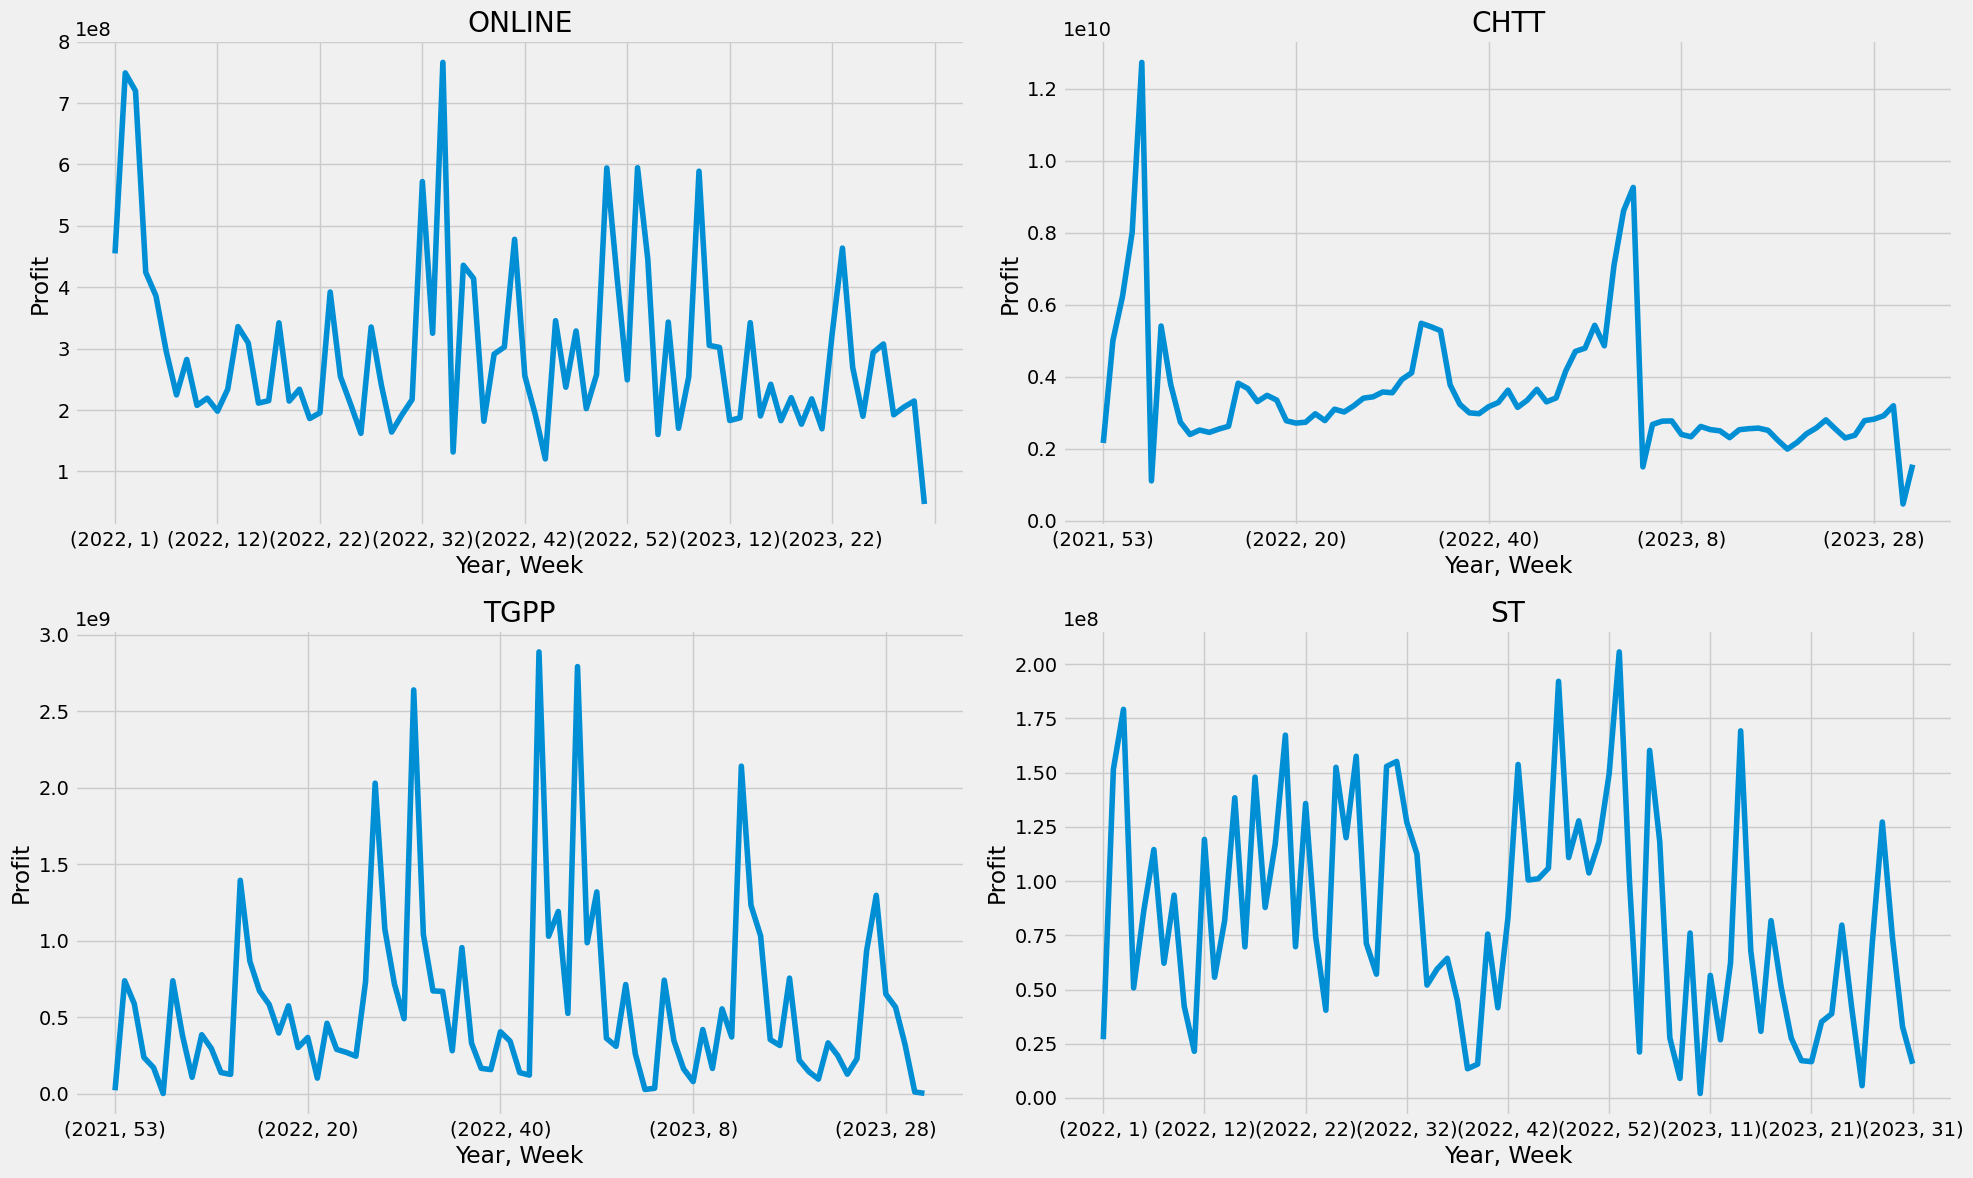

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for i, df_ in enumerate([online_df, chtt_df, tgpp_df, st_df]):
    ax = df_.groupby(['year', 'week'])['profit'].sum().plot(ax=axs[i // 2, i % 2], title=df_['channel_id'].iloc[0])
    ax.set_xlabel('Year, Week')
    ax.set_ylabel('Profit')
plt.tight_layout()
plt.show()

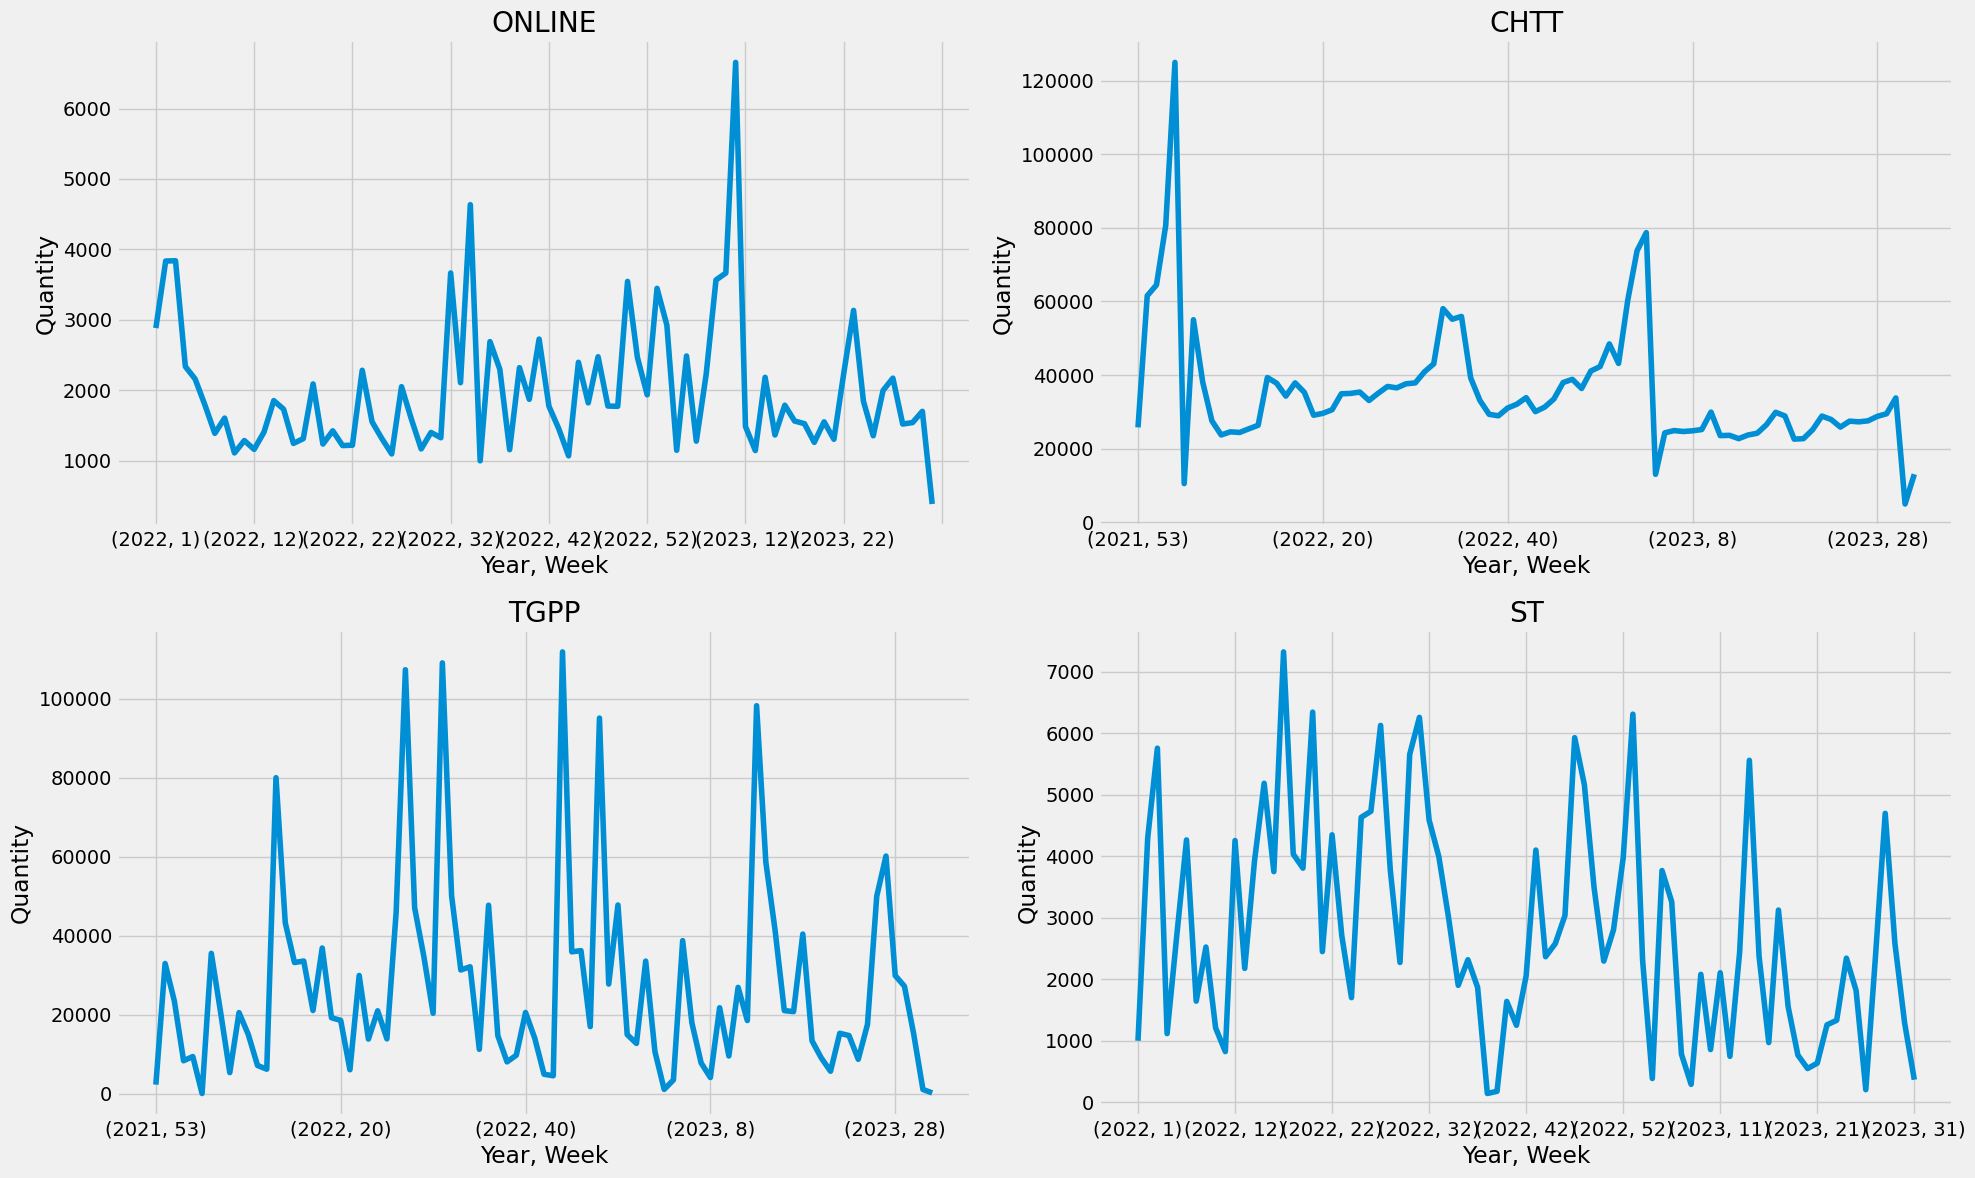

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for i, df_ in enumerate([online_df, chtt_df, tgpp_df, st_df]):
    ax = df_.groupby(['year', 'week'])['quantity'].sum().plot(ax=axs[i // 2, i % 2], title=df_['channel_id'].iloc[0])
    ax.set_xlabel('Year, Week')
    ax.set_ylabel('Quantity')
plt.tight_layout()
plt.show()

In [63]:
profit_dep = pd.DataFrame(dep_df.groupby(['year', 'week'])['profit'].sum()).reset_index(drop=True)
profit_giay = pd.DataFrame(giay_df.groupby(['year', 'week'])['profit'].sum()).reset_index(drop=True)
profit_sandal = pd.DataFrame(sandal_df.groupby(['year', 'week'])['profit'].sum()).reset_index(drop=True)
profit_pk = pd.DataFrame(pk_df.groupby(['year', 'week'])['profit'].sum()).reset_index(drop=True)
profit_tui = pd.DataFrame(tui_df.groupby(['year', 'week'])['profit'].sum()).reset_index(drop=True)

profit_online = pd.DataFrame(online_df.groupby(['year', 'week'])['profit'].sum()).reset_index(drop=True)
profit_chtt = pd.DataFrame(chtt_df.groupby(['year', 'week'])['profit'].sum()).reset_index(drop=True)
profit_tgpp = pd.DataFrame(tgpp_df.groupby(['year', 'week'])['profit'].sum()).reset_index(drop=True)
profit_st = pd.DataFrame(st_df.groupby(['year', 'week'])['profit'].sum()).reset_index(drop=True)

In [64]:
quantity_dep = pd.DataFrame(dep_df.groupby(['year', 'week'])['quantity'].sum()).reset_index(drop=True)
quantity_giay = pd.DataFrame(giay_df.groupby(['year', 'week'])['quantity'].sum()).reset_index(drop=True)
quantity_sandal = pd.DataFrame(sandal_df.groupby(['year', 'week'])['quantity'].sum()).reset_index(drop=True)
quantity_pk = pd.DataFrame(pk_df.groupby(['year', 'week'])['quantity'].sum()).reset_index(drop=True)
quantity_tui = pd.DataFrame(tui_df.groupby(['year', 'week'])['quantity'].sum()).reset_index(drop=True)

quantity_online = pd.DataFrame(online_df.groupby(['year', 'week'])['quantity'].sum()).reset_index(drop=True)
quantity_chtt = pd.DataFrame(chtt_df.groupby(['year', 'week'])['quantity'].sum()).reset_index(drop=True)
quantity_tgpp = pd.DataFrame(tgpp_df.groupby(['year', 'week'])['quantity'].sum()).reset_index(drop=True)
quantity_st = pd.DataFrame(st_df.groupby(['year', 'week'])['quantity'].sum()).reset_index(drop=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Channel Dép Test Mean Squared Error: 1.0188799282257461


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Channel Giày Test Mean Squared Error: 1.3142825099509245


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Channel Sandal Test Mean Squared Error: 0.4526008161064814


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Channel Túi, balo Test Mean Squared Error: 1.7742743964206458


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Channel Phụ kiện Test Mean Squared Error: 1.2562142552080147


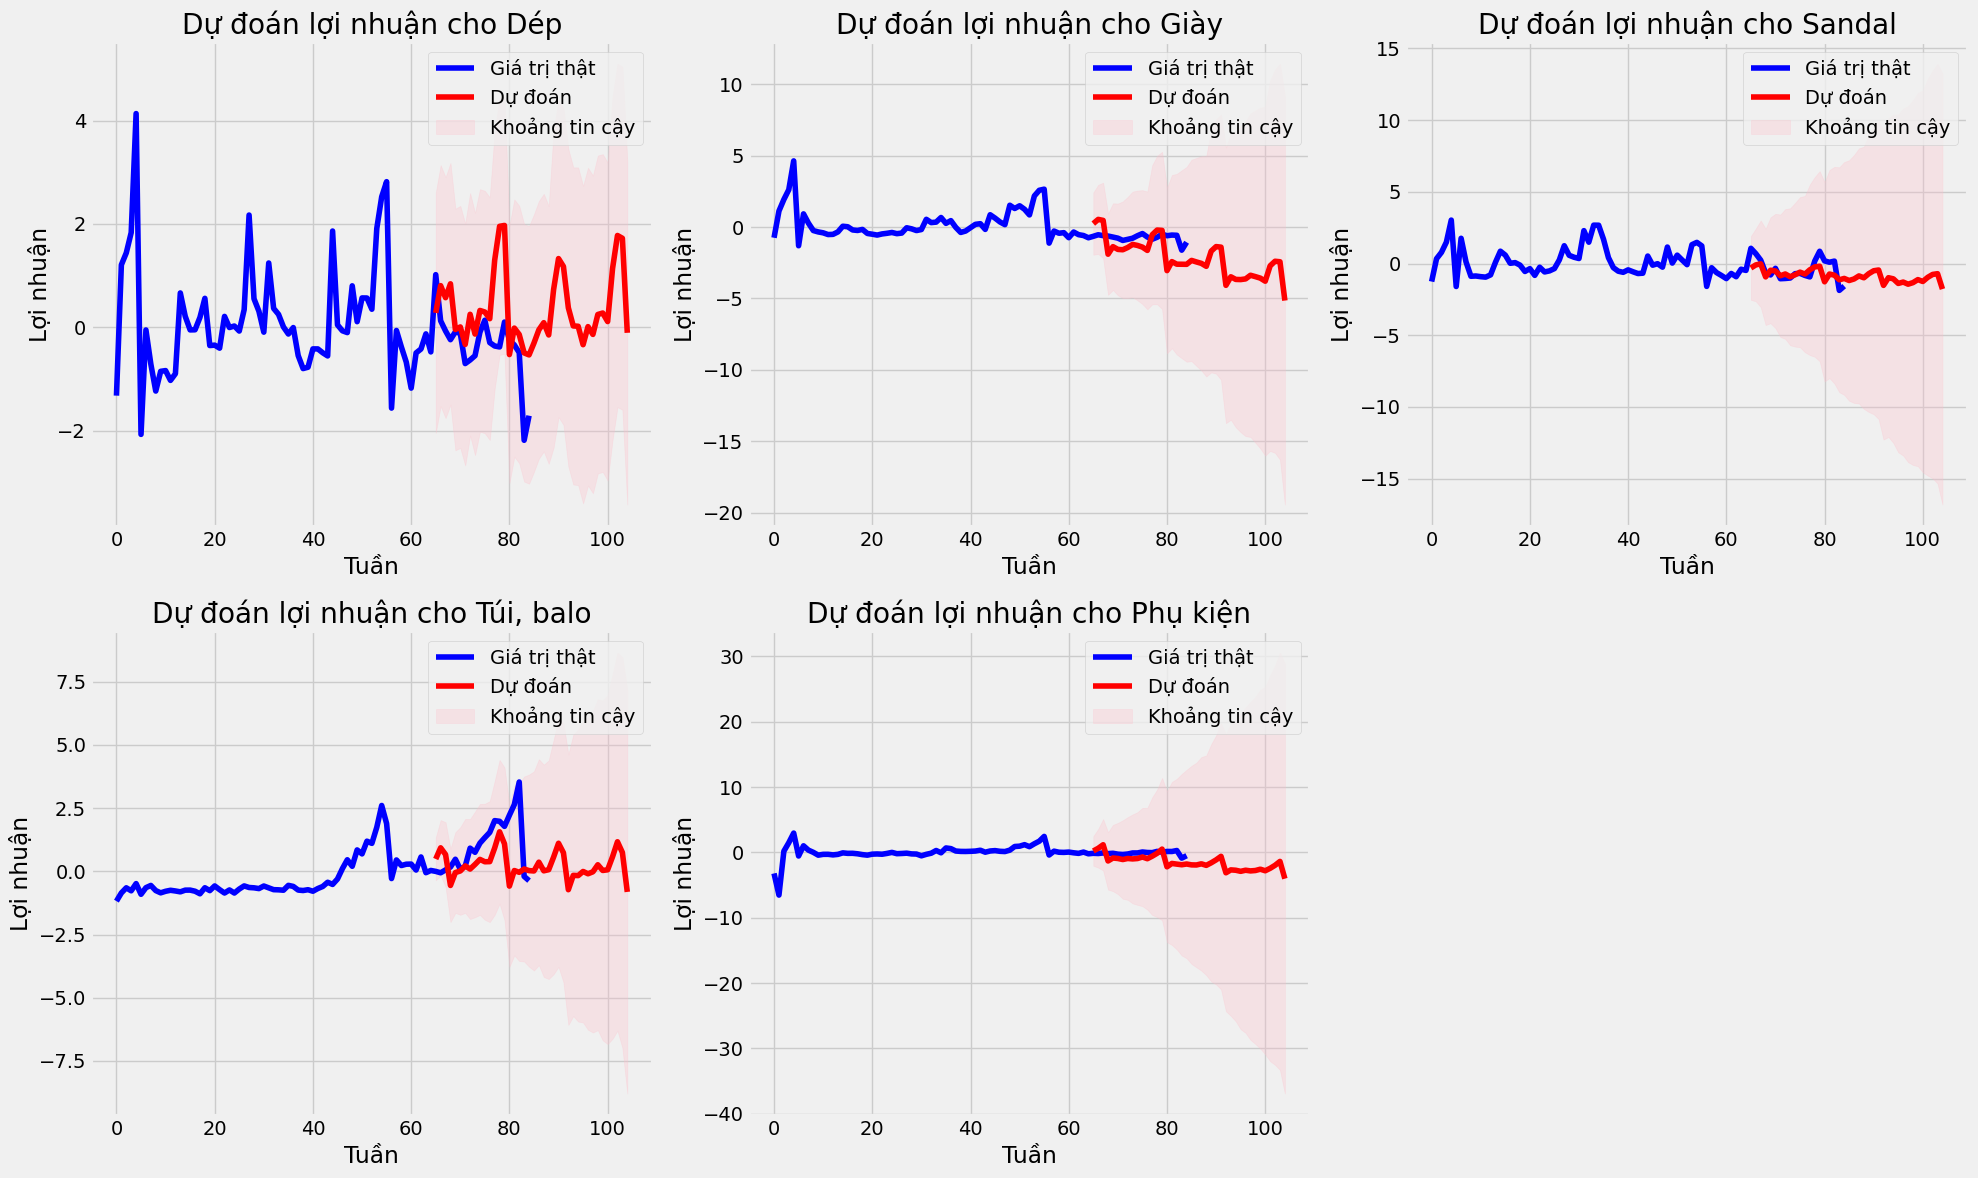

In [65]:
scaler = StandardScaler()
num_weeks = 20
def draw_SARIMAX_type(ax, dataframe, title):
    dataframe['profit'] = scaler.fit_transform(dataframe[['profit']])
    model = SARIMAX(dataframe['profit'][:-num_weeks], order=(1, 1, 2), seasonal_order=(1, 1, 1, 12), suppress_warnings=True)
    results = model.fit()
    forecast_steps = 2 * num_weeks
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    mse_test = mean_squared_error(dataframe['profit'][-num_weeks:], forecast_values[:num_weeks])
    print(f'Channel {title} Test Mean Squared Error: {mse_test}')

    ax.plot(dataframe.index, dataframe['profit'], label='Giá trị thật', color='blue')
    ax.plot(forecast_values.index, forecast_values.values, label='Dự đoán', color='red')
    ax.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Khoảng tin cậy')

    ax.set_title(f'Dự đoán lợi nhuận cho {title}')
    ax.set_xlabel('Tuần')
    ax.set_ylabel('Lợi nhuận')
    ax.legend()
    return forecast_values

fig, axs = plt.subplots(2, 3, figsize=(20, 12))

pr_dep_forecast = draw_SARIMAX_type(axs[0][0], profit_dep, 'Dép')
pr_giay_forecast = draw_SARIMAX_type(axs[0][1], profit_giay, 'Giày')
pr_sandal_forecast = draw_SARIMAX_type(axs[0][2], profit_sandal, 'Sandal')
pr_tui_forecast = draw_SARIMAX_type(axs[1][0], profit_tui, 'Túi, balo')
pr_pk_forecast = draw_SARIMAX_type(axs[1][1], profit_pk, 'Phụ kiện')

axs[1][2].axis('off')
plt.tight_layout()
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Channel Online Test Mean Squared Error: 0.8454832542525608


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Channel Cửa hàng truyền thống Test Mean Squared Error: 2.3066412409284833


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Channel Trung gian Test Mean Squared Error: 1.056368286013344


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Channel Siêu thị Test Mean Squared Error: 1.8733837991400037


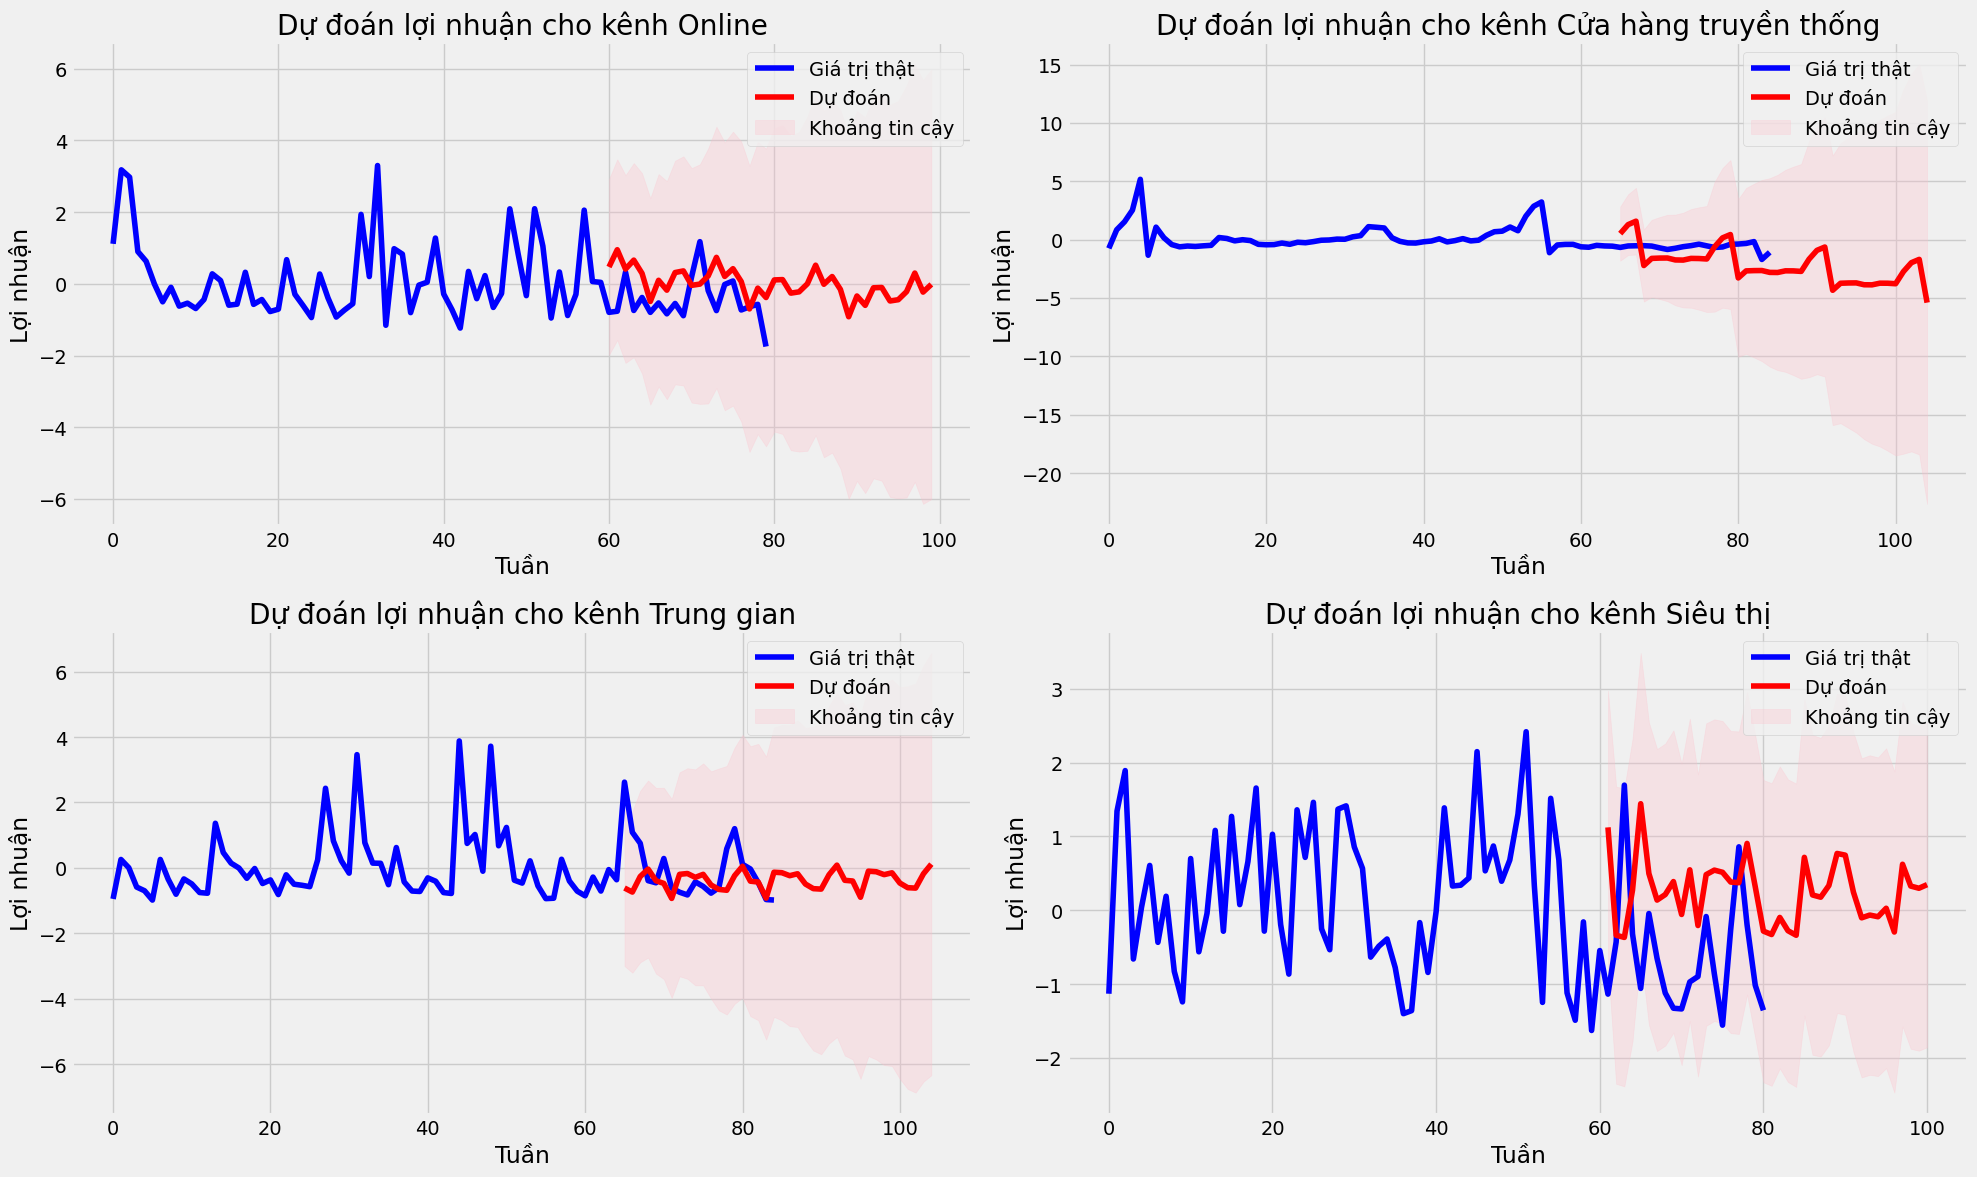

In [66]:
def draw_SARIMAX_channel(ax, dataframe, title):
    dataframe['profit'] = scaler.fit_transform(dataframe[['profit']])
    model = SARIMAX(dataframe['profit'][:-num_weeks], order=(1, 1, 2), seasonal_order=(1, 1, 1, 12), suppress_warnings=True)
    results = model.fit()
    forecast_steps = 2 * num_weeks
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    mse_test = mean_squared_error(dataframe['profit'][-num_weeks:], forecast_values[:num_weeks])
    print(f'Channel {title} Test Mean Squared Error: {mse_test}')

    ax.plot(dataframe.index, dataframe['profit'], label='Giá trị thật', color='blue')
    ax.plot(forecast_values.index, forecast_values.values, label='Dự đoán', color='red')
    ax.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Khoảng tin cậy')

    ax.set_title(f'Dự đoán lợi nhuận cho kênh {title}')
    ax.set_xlabel('Tuần')
    ax.set_ylabel('Lợi nhuận')
    ax.legend()
    return forecast_values

fig, axs = plt.subplots(2, 2, figsize=(20, 12))

pr_online_forecast = draw_SARIMAX_channel(axs[0][0], profit_online, 'Online')
pr_chtt_forecast = draw_SARIMAX_channel(axs[0][1], profit_chtt, 'Cửa hàng truyền thống')
pr_tgpp_forecast = draw_SARIMAX_channel(axs[1][0], profit_tgpp, 'Trung gian')
pr_st_forecast = draw_SARIMAX_channel(axs[1][1], profit_st, 'Siêu thị')

plt.tight_layout()
plt.show()

In [67]:
profit_forecast = pd.DataFrame({'Dep': pr_dep_forecast, 'Giay': pr_giay_forecast, 'Sandal': pr_sandal_forecast, 
                            'Tui': pr_tui_forecast, 'PK': pr_pk_forecast, 'Online': pr_online_forecast, 
                            'CHTT': pr_chtt_forecast, 'TGPP': pr_tgpp_forecast, 'ST': pr_st_forecast})
profit_forecast = profit_forecast.tail(num_weeks).fillna(profit_forecast.mean()).reset_index(drop=True)

for i in profit_forecast.columns:
    profit_forecast[i] = scaler.inverse_transform(profit_forecast[[i]])

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Channel Dép Test Mean Squared Error: 0.7669684663429703


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Channel Giày Test Mean Squared Error: 0.2045850043189918


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Channel Sandal Test Mean Squared Error: 1.6207877706378375


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Channel Túi, balo Test Mean Squared Error: 2.1421815151888146


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Channel Phụ kiện Test Mean Squared Error: 2.8149179837653358


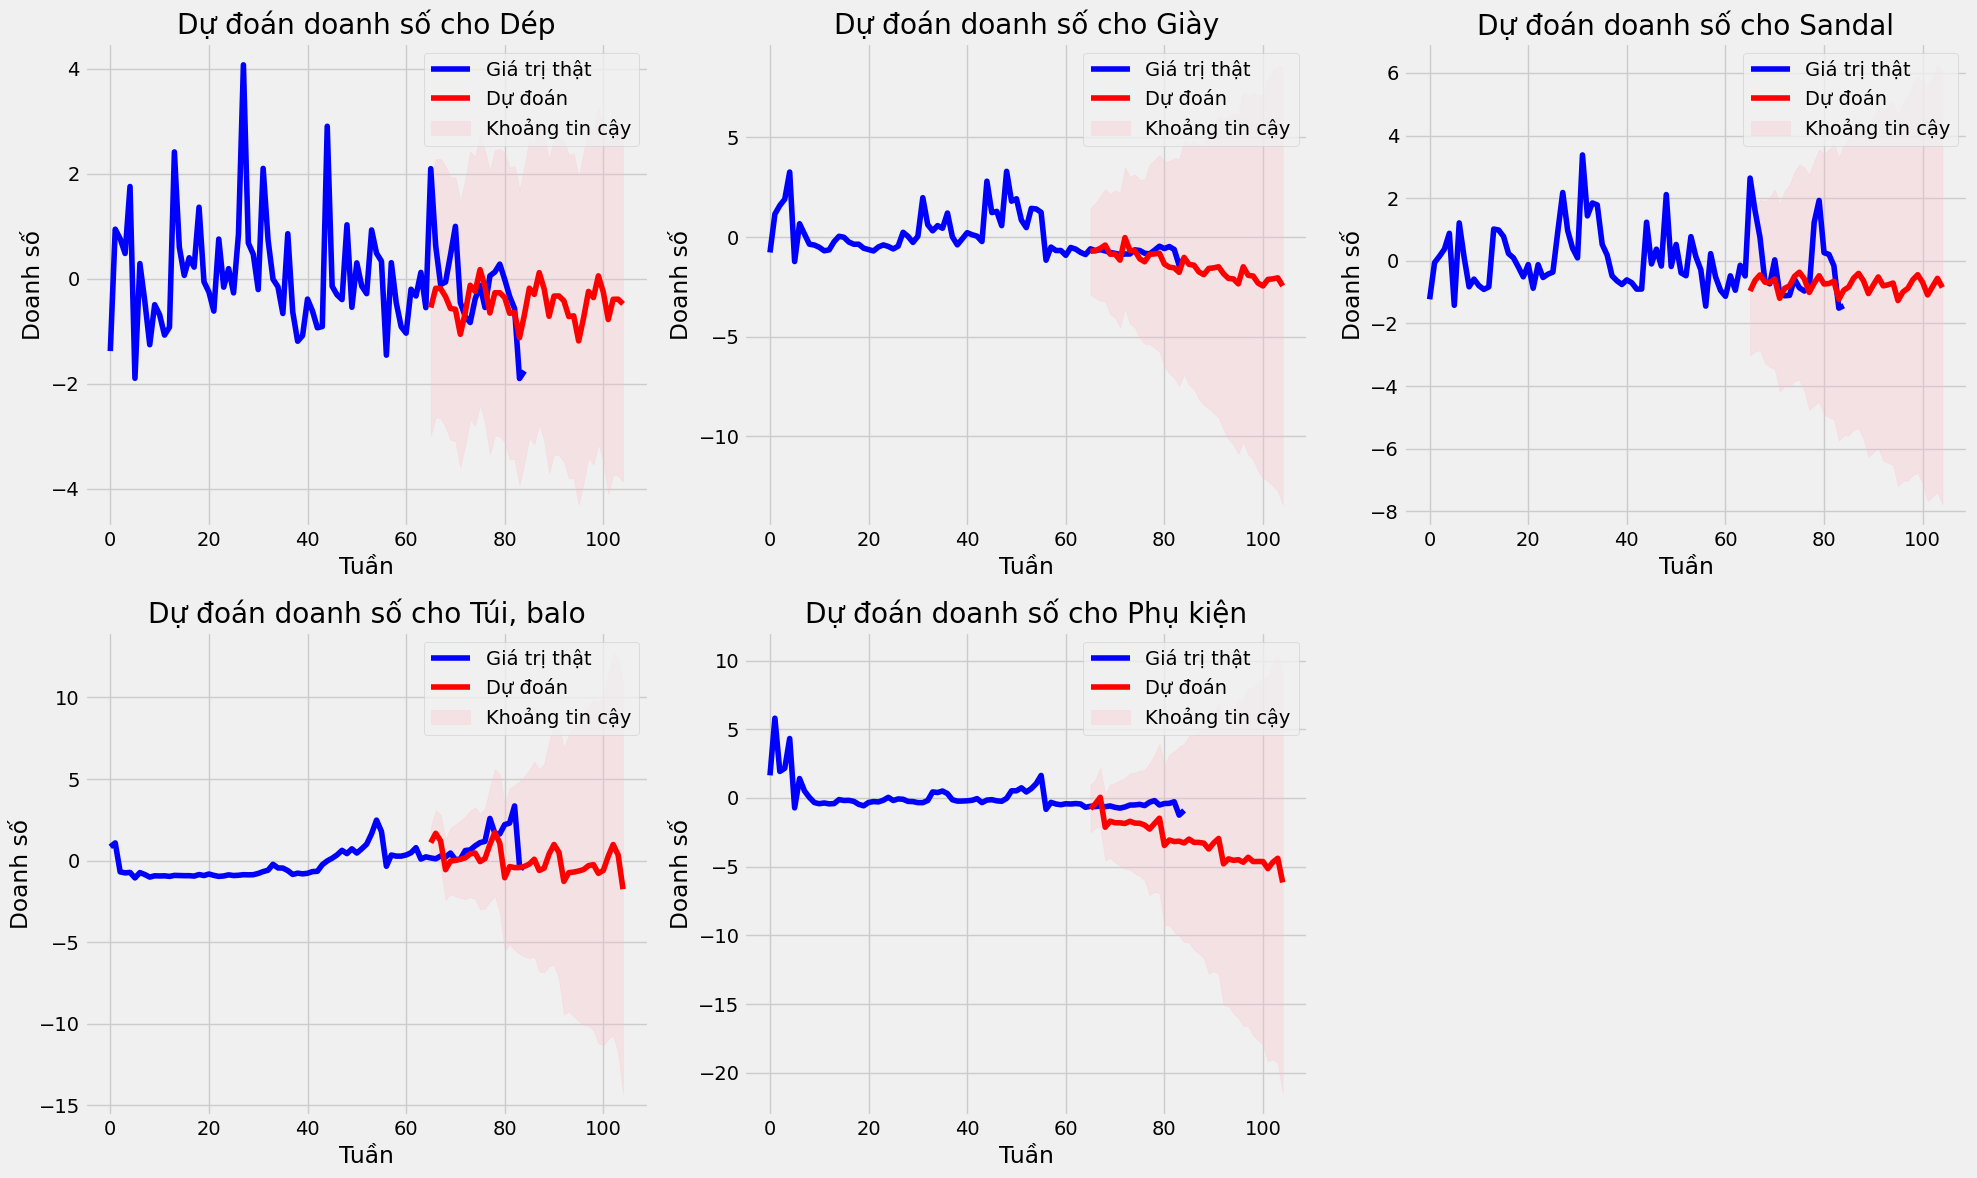

In [68]:
def draw_SARIMAX_type(ax, dataframe, title):
    dataframe['quantity'] = scaler.fit_transform(dataframe[['quantity']])
    model = SARIMAX(dataframe['quantity'][:-num_weeks], order=(1, 1, 2), seasonal_order=(1, 1, 1, 12), suppress_warnings=True)
    results = model.fit()
    forecast_steps = 2 * num_weeks
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    mse_test = mean_squared_error(dataframe['quantity'][-num_weeks:], forecast_values[:num_weeks])
    print(f'Channel {title} Test Mean Squared Error: {mse_test}')

    ax.plot(dataframe.index, dataframe['quantity'], label='Giá trị thật', color='blue')
    ax.plot(forecast_values.index, forecast_values.values, label='Dự đoán', color='red')
    ax.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Khoảng tin cậy')

    ax.set_title(f'Dự đoán doanh số cho {title}')
    ax.set_xlabel('Tuần')
    ax.set_ylabel('Doanh số')
    ax.legend()
    return forecast_values

fig, axs = plt.subplots(2, 3, figsize=(20, 12))

q_dep_forecast = draw_SARIMAX_type(axs[0][0], quantity_dep, 'Dép')
q_giay_forecast = draw_SARIMAX_type(axs[0][1], quantity_giay, 'Giày')
q_sandal_forecast = draw_SARIMAX_type(axs[0][2], quantity_sandal, 'Sandal')
q_tui_forecast = draw_SARIMAX_type(axs[1][0], quantity_tui, 'Túi, balo')
q_pk_forecast = draw_SARIMAX_type(axs[1][1], quantity_pk, 'Phụ kiện')

axs[1][2].axis('off')
plt.tight_layout()
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Channel Online Test Mean Squared Error: 19.000990679175032


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Channel Cửa hàng truyền thống Test Mean Squared Error: 2.5936352849365


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Channel Trung gian Test Mean Squared Error: 1.1336574011810021


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Channel Siêu thị Test Mean Squared Error: 0.7544684685783024


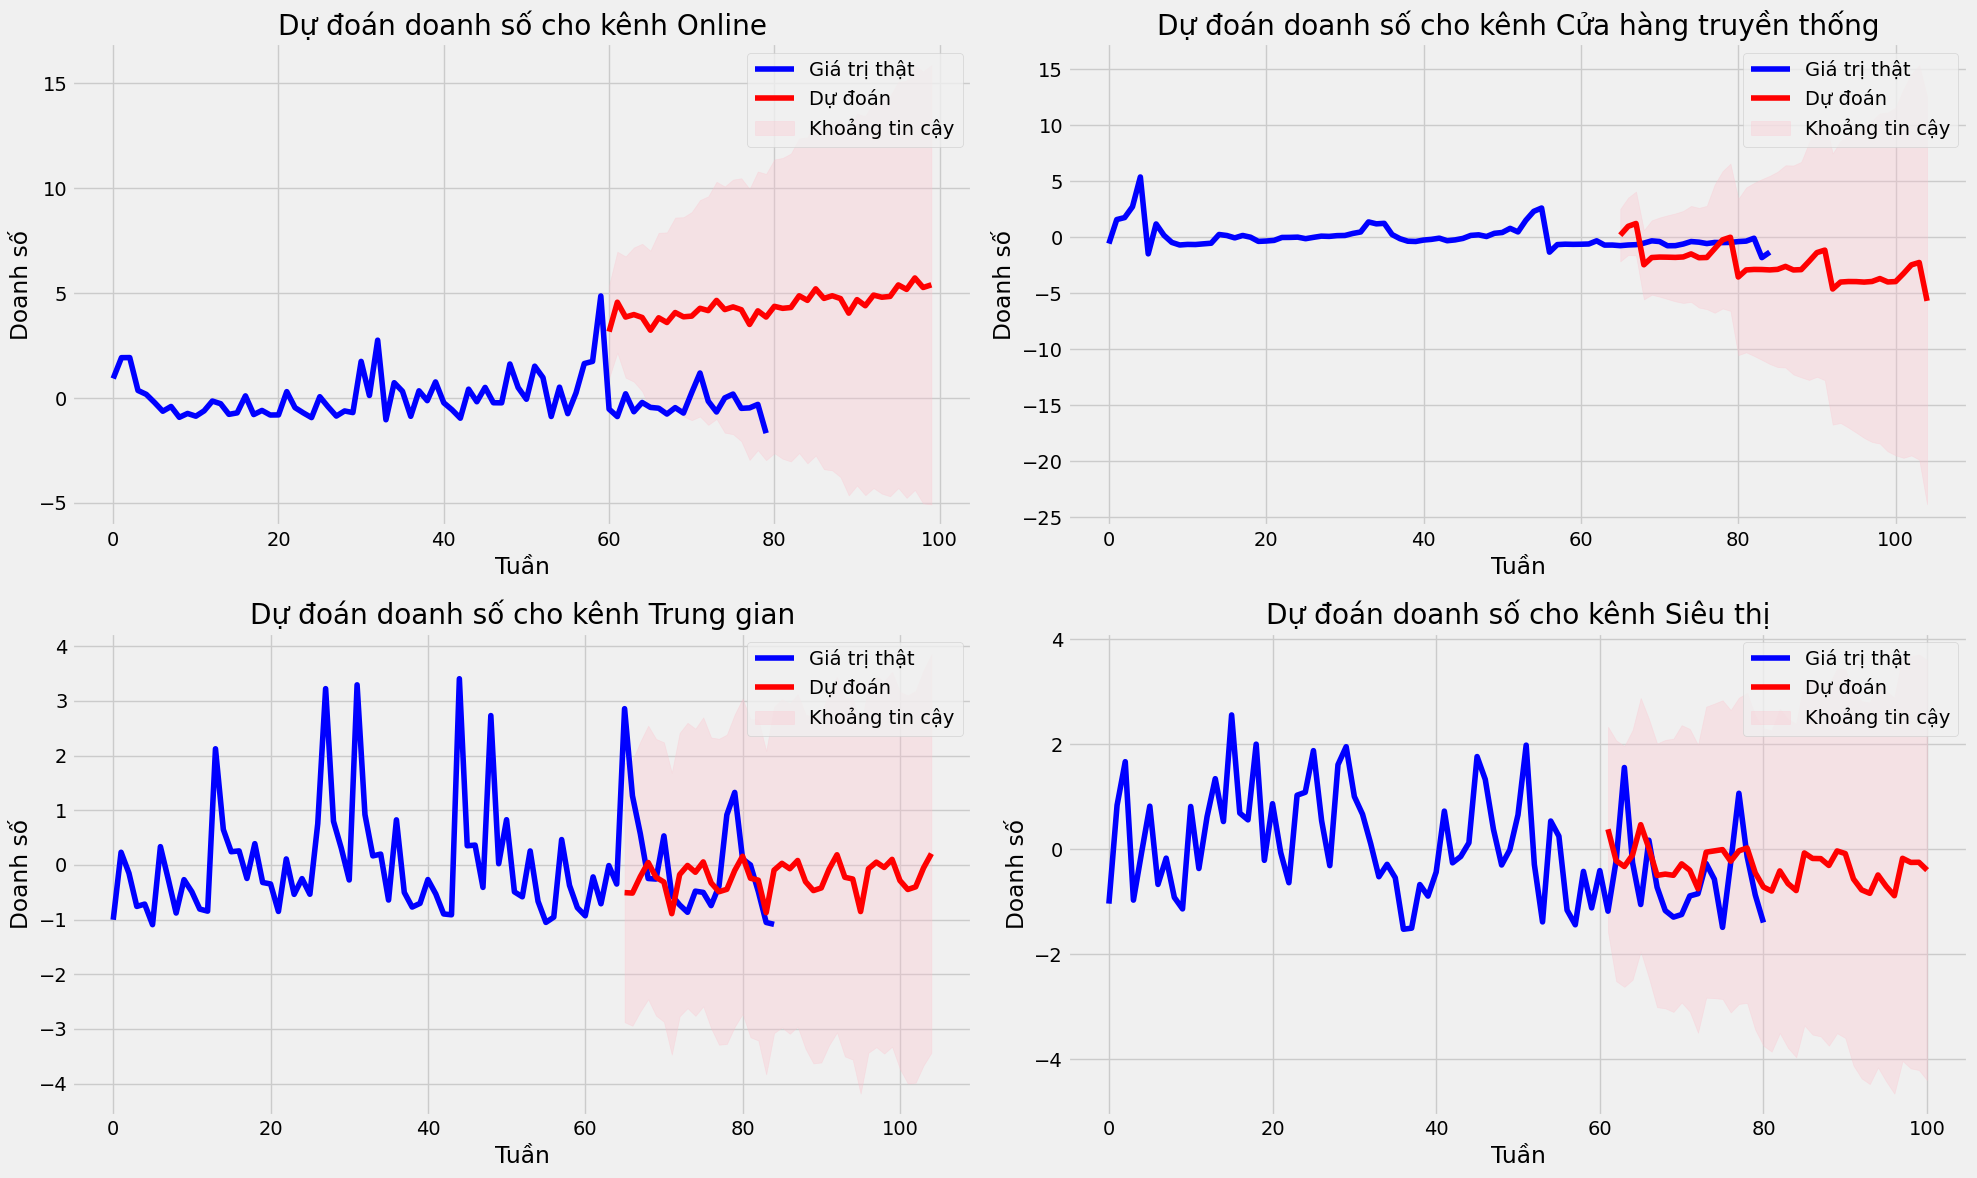

In [69]:
def draw_SARIMAX_channel(ax, dataframe, title):
    dataframe['quantity'] = scaler.fit_transform(dataframe[['quantity']])
    model = SARIMAX(dataframe['quantity'][:-num_weeks], order=(1, 1, 2), seasonal_order=(1, 1, 1, 12), suppress_warnings=True)
    results = model.fit()
    forecast_steps = 2 * num_weeks
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    mse_test = mean_squared_error(dataframe['quantity'][-num_weeks:], forecast_values[:num_weeks])
    print(f'Channel {title} Test Mean Squared Error: {mse_test}')

    ax.plot(dataframe.index, dataframe['quantity'], label='Giá trị thật', color='blue')
    ax.plot(forecast_values.index, forecast_values.values, label='Dự đoán', color='red')
    ax.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Khoảng tin cậy')

    ax.set_title(f'Dự đoán doanh số cho kênh {title}')
    ax.set_xlabel('Tuần')
    ax.set_ylabel('Doanh số')
    ax.legend()
    return forecast_values

fig, axs = plt.subplots(2, 2, figsize=(20, 12))

q_online_forecast = draw_SARIMAX_channel(axs[0][0], quantity_online, 'Online')
q_chtt_forecast = draw_SARIMAX_channel(axs[0][1], quantity_chtt, 'Cửa hàng truyền thống')
q_tgpp_forecast = draw_SARIMAX_channel(axs[1][0], quantity_tgpp, 'Trung gian')
q_st_forecast = draw_SARIMAX_channel(axs[1][1], quantity_st, 'Siêu thị')

plt.tight_layout()
plt.show()

In [70]:
quantity_forecast = pd.DataFrame({'Dep': q_dep_forecast, 'Giay': q_giay_forecast, 'Sandal': q_sandal_forecast, 
                            'Tui': q_tui_forecast, 'PK': q_pk_forecast, 'Online': q_online_forecast, 
                            'CHTT': q_chtt_forecast, 'TGPP': q_tgpp_forecast, 'ST': q_st_forecast})
quantity_forecast = quantity_forecast.tail(num_weeks).fillna(quantity_forecast.mean()).reset_index(drop=True)

for i in quantity_forecast.columns:
    quantity_forecast[i] = scaler.inverse_transform(quantity_forecast[[i]])

quantity_forecast

,Dep,Giay,Sandal,Tui,PK,Online,CHTT,TGPP,ST
0,2499.800063,406.755748,1347.768504,2448.869408,-2439.337702,11965.310525,-2228.508925,2871.279684,2695.600703
1,2291.604684,338.673890,1846.135348,2966.174451,-2861.666686,11164.042866,-1763.004093,2698.240088,2511.850714
2,3021.140176,-257.627894,2113.229011,1757.045753,-2864.030685,11387.070679,-2320.065676,2962.946078,2505.868613
3,2474.828050,-499.065958,1698.340640,2004.555701,-2962.367566,11150.852043,-2269.146324,2282.474812,2276.578675
4,1559.973392,48.272622,978.680063,3528.947454,-3710.818038,9928.702550,-962.890130,1995.292656,2762.845659
5,2236.788684,98.309236,1461.849147,4556.418397,-2931.445555,11063.766919,405.312638,2080.053621,2675.478705
6,2239.242774,197.269850,1912.924356,3710.144049,-2357.609447,10550.515000,793.570993,2687.525861,1824.650548
7,2080.562820,-414.923839,1414.508510,578.886411,-5614.742591,11444.031950,-5310.414175,3147.485327,1458.798307
8,1549.715637,-832.654280,1473.738480,1522.612737,-4966.719134,11263.536514,-4217.665397,2423.108030,1343.312856
9,1573.588865,-878.618873,1571.868235,1583.981567,-5162.449679,11330.815142,-4137.070829,2367.891018,1958.640955


In [71]:
def get_peak_profit(channel, product_type):
    result = []
    idx = profit_forecast[(profit_forecast[channel].diff() > 0) & 
                       (profit_forecast[product_type].diff() > 0)][[channel, product_type]].index
    for i in idx:
        channel_increase = (profit_forecast.loc[i, channel] - profit_forecast.loc[i - 1, channel])
        type_increase = (profit_forecast.loc[i, product_type] - profit_forecast.loc[i - 1, product_type])
        result.append((channel_increase + type_increase) / 2)
    return idx, result

In [72]:
def get_peak_quantity(channel, product_type):
    result = []
    idx = quantity_forecast[(quantity_forecast[channel].diff() > 0) & 
                       (quantity_forecast[product_type].diff() > 0)][[channel, product_type]].index
    for i in idx:
        channel_increase = (quantity_forecast.loc[i, channel] - quantity_forecast.loc[i - 1, channel])
        type_increase = (quantity_forecast.loc[i, product_type] - quantity_forecast.loc[i - 1, product_type])
        result.append((channel_increase + type_increase) / 2)
    return idx, result

In [84]:
def prediction(channel, product_type):
    idx1, profit_increase = get_peak_profit(channel, product_type)
    idx2, quantity_increase = get_peak_quantity(channel, product_type)
    for week1, p in zip(idx1, profit_increase):
        print(f'Week {week1}, profit increase of {int(round(p, -3))} VND')
    print()
    for week2, q in zip(idx2, quantity_increase):
        print(f'Week {week2}, quantity increase of {int(q)} products')

In [85]:
prediction('CHTT', 'Giay')

Week 4, profit increase of 53161000 VND
Week 5, profit increase of 26939000 VND
Week 8, profit increase of 30207000 VND
Week 16, profit increase of 53422000 VND
Week 17, profit increase of 27016000 VND

Week 4, quantity increase of 926 products
Week 5, quantity increase of 709 products
Week 6, quantity increase of 243 products
Week 16, quantity increase of 917 products
Week 17, quantity increase of 706 products
Week 18, quantity increase of 231 products


In [87]:
import pickle

with open('../forecast/profit_forecast.pkl', 'wb') as file:
    pickle.dump(profit_forecast, file)

with open('../forecast/quantity_forecast.pkl', 'wb') as file:
    pickle.dump(quantity_forecast, file)